In [7]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
import os
import re
import json
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, List, Optional, Union, cast
import requests
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import acquired, explore, prepare, model
from env import token, username

languages = []

> Create a data dictionary

In [3]:
prepare.custom_visual()

AttributeError: module 'prepare' has no attribute 'custom_visual'

> Start Here

In [ ]:
df = acquired.get_github_data(token, username)

In [4]:
df

NameError: name 'df' is not defined

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('readme_data_first_look.csv', index=False)

In [8]:
# Load the DataFrame to a CSV file
df = pd.read_csv('readme_data_first_look.csv')

> Baseline

In [9]:
prepare.clean_readme_data(df)

,Repository,Readme,Language
0,EbookFoundation/free-programming-books,brazilmorefreeprogramminginteractivetutorialsp...,NaN
1,996icu/996.ICU,dbkmtqwhperyvtkwboceetbkqfrrkd yourself licens...,NaN
2,jwasham/coding-interview-university,fork have stored copied resizing markov bstsbi...,NaN
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,NaN
4,public-apis/public-apis,geodatagovgr have senseboxes covid diagrams va...,Python
...,...,...,...
95,coder/code-server,prints downloads a have provider vm screenshot...,TypeScript
96,resume/resume.github.com,persons project gem based a have rackup ruby m...,JavaScript
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,C
98,reduxjs/redux,have stored subscribe just eriksons tiny cues ...,TypeScript


In [10]:
explore.process_dataframe(df)

                                Repository  \
0   EbookFoundation/free-programming-books   
1                           996icu/996.ICU   
2      jwasham/coding-interview-university   
3                     sindresorhus/awesome   
4                  public-apis/public-apis   
..                                     ...   
95                       coder/code-server   
96                resume/resume.github.com   
97                             redis/redis   
98                           reduxjs/redux   
99                               atom/atom   

                                               Readme Language  
0   brazilmorefreeprogramminginteractivetutorialsp...    Other  
1   dbkmtqwhperyvtkwboceetbkqfrrkd yourself licens...    Other  
2   fork have stored copied resizing markov bstsbi...    Other  
3   neuroscience stored healthcare markov designin...    Other  
4   geodatagovgr have senseboxes covid diagrams va...   Python  
..                                                ...    

In [11]:
prepare.preprocess_text(df)

0     have perhaps merged clicking languages howtodo...
1     yourself licenses practitioners btcbtc advice ...
2     fork have stored copied resizing markov design...
3     neuroscience stored healthcare markov designin...
4     geodatagovgr have senseboxes covid diagrams va...
                            ...                        
95    prints downloads have provider vm indepth join...
96    persons project gem based have rackup ruby mod...
97    fork utilsgentestcertssh rediscommand sentinel...
98    have stored subscribe just eriksons tiny cues ...
99    find by under announcement logo these dependen...
Name: Readme, Length: 100, dtype: object

In [12]:
df

,Repository,Readme,Language
0,EbookFoundation/free-programming-books,have perhaps merged clicking languages howtodo...,Other
1,996icu/996.ICU,yourself licenses practitioners btcbtc advice ...,Other
2,jwasham/coding-interview-university,fork have stored copied resizing markov design...,Other
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other
4,public-apis/public-apis,geodatagovgr have senseboxes covid diagrams va...,Python
...,...,...,...
95,coder/code-server,prints downloads have provider vm indepth join...,Other
96,resume/resume.github.com,persons project gem based have rackup ruby mod...,Other
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,Other
98,reduxjs/redux,have stored subscribe just eriksons tiny cues ...,Other


In [13]:
# Call the function and pass your DataFrame as the argument
prepare.apply_stopword_removal(df)

,Repository,Readme,Language
0,EbookFoundation/free-programming-books,perhaps merged clicking languages howtodocshow...,Other
1,996icu/996.ICU,licenses practitioners btcbtc advice youzan co...,Other
2,jwasham/coding-interview-university,fork stored copied resizing markov designing r...,Other
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other
4,public-apis/public-apis,geodatagovgr senseboxes covid diagrams vatcomp...,Python
...,...,...,...
95,coder/code-server,prints downloads provider vm indepth join help...,Other
96,resume/resume.github.com,persons project gem based rackup ruby mode con...,Other
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,Other
98,reduxjs/redux,stored subscribe eriksons tiny cues idea want ...,Other


In [14]:
prepare.extract_common_words(df)

[('your_neg', 63),
 ('github', 62),
 ('the_neg', 55),
 ('can_neg', 55),
 ('or_neg', 52),
 ('using', 51),
 ('an_neg', 51),
 ('by_neg', 49),
 ('of_neg', 48),
 ('code_neg', 48)]

In [15]:
prepare.apply_pos_tagging_and_lemmatization(df)

,Repository,Readme,Language,POS_tags,Lemmas
0,EbookFoundation/free-programming-books,perhaps merged clicking languages howtodocshow...,Other,"[(perhaps, RB), (merged, VBD), (clicking, VBG)...","[perhaps, merge, click, language, howtodocshow..."
1,996icu/996.ICU,licenses practitioners btcbtc advice youzan co...,Other,"[(licenses, NNS), (practitioners, NNS), (btcbt...","[license, practitioner, btcbtc, advice, youzan..."
2,jwasham/coding-interview-university,fork stored copied resizing markov designing r...,Other,"[(fork, NN), (stored, VBD), (copied, JJ), (res...","[fork, store, copied, resize, markov, design, ..."
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other,"[(neuroscience, NN), (stored, VBD), (healthcar...","[neuroscience, store, healthcare, markov, desi..."
4,public-apis/public-apis,geodatagovgr senseboxes covid diagrams vatcomp...,Python,"[(geodatagovgr, NN), (senseboxes, NNS), (covid...","[geodatagovgr, senseboxes, covid, diagram, vat..."
...,...,...,...,...,...
95,coder/code-server,prints downloads provider vm indepth join help...,Other,"[(prints, NNS), (downloads, NNS), (provider, V...","[print, downloads, provider, vm, indepth, join..."
96,resume/resume.github.com,persons project gem based rackup ruby mode con...,Other,"[(persons, NNS), (project, VBP), (gem, NN), (b...","[person, project, gem, base, rackup, ruby, mod..."
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,Other,"[(fork, NN), (utilsgentestcertssh, JJ), (redis...","[fork, utilsgentestcertssh, rediscommand, sent..."
98,reduxjs/redux,stored subscribe eriksons tiny cues idea want ...,Other,"[(stored, VBN), (subscribe, JJ), (eriksons, NN...","[store, subscribe, eriksons, tiny, cue, idea, ..."


In [17]:
# Save the DataFrame to a CSV file
df.to_csv('readme_data.csv', index=False)

In [18]:
df

,Repository,Readme,Language,POS_tags,Lemmas
0,EbookFoundation/free-programming-books,perhaps merged clicking languages howtodocshow...,Other,"[(perhaps, RB), (merged, VBD), (clicking, VBG)...","[perhaps, merge, click, language, howtodocshow..."
1,996icu/996.ICU,licenses practitioners btcbtc advice youzan co...,Other,"[(licenses, NNS), (practitioners, NNS), (btcbt...","[license, practitioner, btcbtc, advice, youzan..."
2,jwasham/coding-interview-university,fork stored copied resizing markov designing r...,Other,"[(fork, NN), (stored, VBD), (copied, JJ), (res...","[fork, store, copied, resize, markov, design, ..."
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other,"[(neuroscience, NN), (stored, VBD), (healthcar...","[neuroscience, store, healthcare, markov, desi..."
4,public-apis/public-apis,geodatagovgr senseboxes covid diagrams vatcomp...,Python,"[(geodatagovgr, NN), (senseboxes, NNS), (covid...","[geodatagovgr, senseboxes, covid, diagram, vat..."
...,...,...,...,...,...
95,coder/code-server,prints downloads provider vm indepth join help...,Other,"[(prints, NNS), (downloads, NNS), (provider, V...","[print, downloads, provider, vm, indepth, join..."
96,resume/resume.github.com,persons project gem based rackup ruby mode con...,Other,"[(persons, NNS), (project, VBP), (gem, NN), (b...","[person, project, gem, base, rackup, ruby, mod..."
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,Other,"[(fork, NN), (utilsgentestcertssh, JJ), (redis...","[fork, utilsgentestcertssh, rediscommand, sent..."
98,reduxjs/redux,stored subscribe eriksons tiny cues idea want ...,Other,"[(stored, VBN), (subscribe, JJ), (eriksons, NN...","[store, subscribe, eriksons, tiny, cue, idea, ..."


In [19]:
# Calculate the frequency of words in the 'Readme' column and select the top 10 most frequent words
freq = pd.Series(' '.join(df['Readme']).split()).value_counts()[:10]

# Convert the frequency series to a list of words
freq = list(freq.index)

# Remove the top 10 most frequent words from the 'Readme' column
df['Readme'] = df['Readme'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [20]:
df

,Repository,Readme,Language,POS_tags,Lemmas
0,EbookFoundation/free-programming-books,perhaps merged clicking languages howtodocshow...,Other,"[(perhaps, RB), (merged, VBD), (clicking, VBG)...","[perhaps, merge, click, language, howtodocshow..."
1,996icu/996.ICU,licenses practitioners btcbtc advice youzan co...,Other,"[(licenses, NNS), (practitioners, NNS), (btcbt...","[license, practitioner, btcbtc, advice, youzan..."
2,jwasham/coding-interview-university,fork stored copied resizing markov designing r...,Other,"[(fork, NN), (stored, VBD), (copied, JJ), (res...","[fork, store, copied, resize, markov, design, ..."
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other,"[(neuroscience, NN), (stored, VBD), (healthcar...","[neuroscience, store, healthcare, markov, desi..."
4,public-apis/public-apis,geodatagovgr senseboxes covid diagrams vatcomp...,Python,"[(geodatagovgr, NN), (senseboxes, NNS), (covid...","[geodatagovgr, senseboxes, covid, diagram, vat..."
...,...,...,...,...,...
95,coder/code-server,prints downloads provider vm indepth join help...,Other,"[(prints, NNS), (downloads, NNS), (provider, V...","[print, downloads, provider, vm, indepth, join..."
96,resume/resume.github.com,persons project gem based rackup ruby mode con...,Other,"[(persons, NNS), (project, VBP), (gem, NN), (b...","[person, project, gem, base, rackup, ruby, mod..."
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,Other,"[(fork, NN), (utilsgentestcertssh, JJ), (redis...","[fork, utilsgentestcertssh, rediscommand, sent..."
98,reduxjs/redux,stored subscribe eriksons tiny cues idea want ...,Other,"[(stored, VBN), (subscribe, JJ), (eriksons, NN...","[store, subscribe, eriksons, tiny, cue, idea, ..."


In [21]:
# Calculate the frequency of each word in the 'Readme' column
freq = pd.Series(' '.join(df['Readme']).split()).value_counts()

# Select the 10 least frequent words
freq = freq[-10:]

# Convert the index (words) into a list
freq = list(freq.index)

# Remove the least frequent words from the 'Readme' column
df['Readme'] = df['Readme'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [22]:
df

,Repository,Readme,Language,POS_tags,Lemmas
0,EbookFoundation/free-programming-books,perhaps merged clicking languages howtodocshow...,Other,"[(perhaps, RB), (merged, VBD), (clicking, VBG)...","[perhaps, merge, click, language, howtodocshow..."
1,996icu/996.ICU,licenses practitioners btcbtc advice youzan co...,Other,"[(licenses, NNS), (practitioners, NNS), (btcbt...","[license, practitioner, btcbtc, advice, youzan..."
2,jwasham/coding-interview-university,fork stored copied resizing markov designing r...,Other,"[(fork, NN), (stored, VBD), (copied, JJ), (res...","[fork, store, copied, resize, markov, design, ..."
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other,"[(neuroscience, NN), (stored, VBD), (healthcar...","[neuroscience, store, healthcare, markov, desi..."
4,public-apis/public-apis,geodatagovgr senseboxes covid diagrams vatcomp...,Python,"[(geodatagovgr, NN), (senseboxes, NNS), (covid...","[geodatagovgr, senseboxes, covid, diagram, vat..."
...,...,...,...,...,...
95,coder/code-server,prints downloads provider vm indepth join help...,Other,"[(prints, NNS), (downloads, NNS), (provider, V...","[print, downloads, provider, vm, indepth, join..."
96,resume/resume.github.com,persons project gem based rackup ruby mode con...,Other,"[(persons, NNS), (project, VBP), (gem, NN), (b...","[person, project, gem, base, rackup, ruby, mod..."
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,Other,"[(fork, NN), (utilsgentestcertssh, JJ), (redis...","[fork, utilsgentestcertssh, rediscommand, sent..."
98,reduxjs/redux,stored subscribe eriksons tiny cues idea want ...,Other,"[(stored, VBN), (subscribe, JJ), (eriksons, NN...","[store, subscribe, eriksons, tiny, cue, idea, ..."


In [ ]:
# Load the DataFrame to a CSV file
df = pd.read_csv('readme_data.csv')

In [ ]:
df

> Retrieved 100 of the most starred repos

In [23]:
explore.analyze_readme_data(df)

(  Language  Average README Length
 0    Other            8183.876404
 1   Python           14033.818182,
 [('find', 1),
  ('announcement', 1),
  ('logo', 1),
  ('dependencies', 1),
  ('libxxcb', 1),
  ('st', 1),
  ('atomamdtargz', 1),
  ('editor', 1),
  ('designed', 1),
  ('read', 1)],
 {'Other': 8183.876404494382, 'Python': 14033.818181818182})

In [24]:
df

,Repository,Readme,Language,POS_tags,Lemmas
0,EbookFoundation/free-programming-books,perhaps merged clicking languages howtodocshow...,Other,"[(perhaps, RB), (merged, VBD), (clicking, VBG)...","[perhaps, merge, click, language, howtodocshow..."
1,996icu/996.ICU,licenses practitioners btcbtc advice youzan co...,Other,"[(licenses, NNS), (practitioners, NNS), (btcbt...","[license, practitioner, btcbtc, advice, youzan..."
2,jwasham/coding-interview-university,fork stored copied resizing markov designing r...,Other,"[(fork, NN), (stored, VBD), (copied, JJ), (res...","[fork, store, copied, resize, markov, design, ..."
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other,"[(neuroscience, NN), (stored, VBD), (healthcar...","[neuroscience, store, healthcare, markov, desi..."
4,public-apis/public-apis,geodatagovgr senseboxes covid diagrams vatcomp...,Python,"[(geodatagovgr, NN), (senseboxes, NNS), (covid...","[geodatagovgr, senseboxes, covid, diagram, vat..."
...,...,...,...,...,...
95,coder/code-server,prints downloads provider vm indepth join help...,Other,"[(prints, NNS), (downloads, NNS), (provider, V...","[print, downloads, provider, vm, indepth, join..."
96,resume/resume.github.com,persons project gem based rackup ruby mode con...,Other,"[(persons, NNS), (project, VBP), (gem, NN), (b...","[person, project, gem, base, rackup, ruby, mod..."
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,Other,"[(fork, NN), (utilsgentestcertssh, JJ), (redis...","[fork, utilsgentestcertssh, rediscommand, sent..."
98,reduxjs/redux,stored subscribe eriksons tiny cues idea want ...,Other,"[(stored, VBN), (subscribe, JJ), (eriksons, NN...","[store, subscribe, eriksons, tiny, cue, idea, ..."


In [25]:
df = explore.merge_analyze_results(df)

In [26]:
df

,Repository,Readme,Language,POS_tags,Lemmas,Word,Count,Average_Readme_Length
0,EbookFoundation/free-programming-books,perhaps merged clicking languages howtodocshow...,Other,"[(perhaps, RB), (merged, VBD), (clicking, VBG)...","[perhaps, merge, click, language, howtodocshow...",find,1,8183.876404
1,996icu/996.ICU,licenses practitioners btcbtc advice youzan co...,Other,"[(licenses, NNS), (practitioners, NNS), (btcbt...","[license, practitioner, btcbtc, advice, youzan...",find,1,8183.876404
2,jwasham/coding-interview-university,fork stored copied resizing markov designing r...,Other,"[(fork, NN), (stored, VBD), (copied, JJ), (res...","[fork, store, copied, resize, markov, design, ...",find,1,8183.876404
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other,"[(neuroscience, NN), (stored, VBD), (healthcar...","[neuroscience, store, healthcare, markov, desi...",find,1,8183.876404
4,public-apis/public-apis,geodatagovgr senseboxes covid diagrams vatcomp...,Python,"[(geodatagovgr, NN), (senseboxes, NNS), (covid...","[geodatagovgr, senseboxes, covid, diagram, vat...",announcement,1,14033.818182
...,...,...,...,...,...,...,...,...
95,coder/code-server,prints downloads provider vm indepth join help...,Other,"[(prints, NNS), (downloads, NNS), (provider, V...","[print, downloads, provider, vm, indepth, join...",find,1,8183.876404
96,resume/resume.github.com,persons project gem based rackup ruby mode con...,Other,"[(persons, NNS), (project, VBP), (gem, NN), (b...","[person, project, gem, base, rackup, ruby, mod...",find,1,8183.876404
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,Other,"[(fork, NN), (utilsgentestcertssh, JJ), (redis...","[fork, utilsgentestcertssh, rediscommand, sent...",find,1,8183.876404
98,reduxjs/redux,stored subscribe eriksons tiny cues idea want ...,Other,"[(stored, VBN), (subscribe, JJ), (eriksons, NN...","[store, subscribe, eriksons, tiny, cue, idea, ...",find,1,8183.876404


In [27]:
# Save the DataFrame to a CSV file
df.to_csv('readme_data.csv', index=False)

> Scraped the README files from each repository

Performs web scraping to gather README files from a list of GitHub repositories. Let's go through the code and its output step by step:

The code imports the required libraries and modules: datetime, requests, pandas, and the token and username variables from the env.py file.
The repos list contains the names of the repositories from which we want to scrape README files.
The readme_data dictionary is initialized to store the repository names and their corresponding README contents.
8-19. The code iterates over each repository in the repos list. It constructs the URL for the repository's README file using the GitHub API. It sends a GET request to the URL with the necessary authentication headers. If the response is successful (status code 200), it extracts the content of the README file.

12-15. The base64-encoded content is decoded and converted to UTF-8 format to obtain the plain text of the README file.

18-20. The repository name and the corresponding README content are appended to the readme_data dictionary.

23-26. Once all the repositories have been processed, the readme_data dictionary is converted into a DataFrame using the pd.DataFrame() function.

The DataFrame is saved to a CSV file named 'readme_data.csv' using the to_csv() method.
32-34. The code prints a notification message indicating the date when the data was collected. The datetime.now() function retrieves the current date, which is then formatted as "%Y-%m-%d" (e.g., "2023-05-14").

In [ ]:
df

In [ ]:
df.describe()

performs various operations related to scraping and analyzing README files from GitHub repositories. Let's go through the code and its output step by step:

1-4: The code imports the required libraries and modules: requests, pandas, re, Counter, and the token and username variables from the env.py file.

7-16: The code defines the GitHub API endpoint and sets the parameters for the API request. These parameters specify the search query, sorting criteria, order, and number of repositories to retrieve.

18-21: Authentication headers are set using the token and username variables to authorize the request.

24-29: The code sends a GET request to the GitHub API with the specified URL, parameters, and authentication headers.

32-40: The response status code is checked to ensure that the request was successful (status code 200). If successful, the repository names are extracted from the response data.

43-54: A list of programming-related words is defined. These words represent common programming languages.

57-59: A dictionary called word_categories is created to categorize words by programming language. Each word is initially associated with an empty list.

62-80: The code iterates over each repository in the retrieved list of repositories. For each repository, it constructs the URL for the README file using the GitHub API. It sends a GET request to the URL with the necessary authentication headers. If the response is successful, it extracts the content of the README file.

83-89: The base64-encoded content is decoded and converted to UTF-8 format to obtain the plain text of the README file.

92-99: The code uses regular expressions (re.findall()) to extract individual words from the README text. These words are converted to lowercase.

102-106: The words are categorized by programming language. If a word exists in the word_categories dictionary, the repository is added to the corresponding list.

109-112: The code finds the most common words in the READMEs using the Counter class from the collections module. The most_common() method is used to retrieve the most common words and their counts.

115-121: The most common words are displayed, along with their counts.

The output of this code will be the most common words found in the READMEs, along with their respective frequencies. For example:

Most common words in READMEs:
the: 166
cheat: 149
sh: 146
you: 115
a: 101
to: 93
cht: 81
and: 62
in: 62
https: 60

These words indicate the frequency at which they appear in the README files.

> Need to create a fucntion for the code below

In [28]:
df

,Repository,Readme,Language,POS_tags,Lemmas,Word,Count,Average_Readme_Length
0,EbookFoundation/free-programming-books,perhaps merged clicking languages howtodocshow...,Other,"[(perhaps, RB), (merged, VBD), (clicking, VBG)...","[perhaps, merge, click, language, howtodocshow...",find,1,8183.876404
1,996icu/996.ICU,licenses practitioners btcbtc advice youzan co...,Other,"[(licenses, NNS), (practitioners, NNS), (btcbt...","[license, practitioner, btcbtc, advice, youzan...",find,1,8183.876404
2,jwasham/coding-interview-university,fork stored copied resizing markov designing r...,Other,"[(fork, NN), (stored, VBD), (copied, JJ), (res...","[fork, store, copied, resize, markov, design, ...",find,1,8183.876404
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other,"[(neuroscience, NN), (stored, VBD), (healthcar...","[neuroscience, store, healthcare, markov, desi...",find,1,8183.876404
4,public-apis/public-apis,geodatagovgr senseboxes covid diagrams vatcomp...,Python,"[(geodatagovgr, NN), (senseboxes, NNS), (covid...","[geodatagovgr, senseboxes, covid, diagram, vat...",announcement,1,14033.818182
...,...,...,...,...,...,...,...,...
95,coder/code-server,prints downloads provider vm indepth join help...,Other,"[(prints, NNS), (downloads, NNS), (provider, V...","[print, downloads, provider, vm, indepth, join...",find,1,8183.876404
96,resume/resume.github.com,persons project gem based rackup ruby mode con...,Other,"[(persons, NNS), (project, VBP), (gem, NN), (b...","[person, project, gem, base, rackup, ruby, mod...",find,1,8183.876404
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,Other,"[(fork, NN), (utilsgentestcertssh, JJ), (redis...","[fork, utilsgentestcertssh, rediscommand, sent...",find,1,8183.876404
98,reduxjs/redux,stored subscribe eriksons tiny cues idea want ...,Other,"[(stored, VBN), (subscribe, JJ), (eriksons, NN...","[store, subscribe, eriksons, tiny, cue, idea, ...",find,1,8183.876404


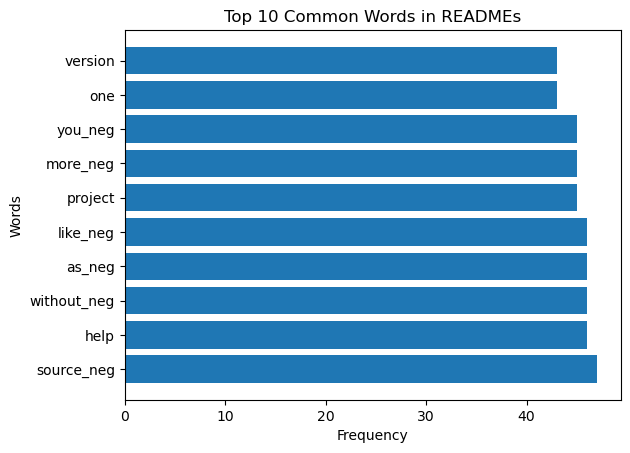

In [29]:
# Call the function
explore.visualize_top_word(df)

> Initial Exploration

> Clean Me!

In [30]:
df, common_words, average_length_by_language = explore.analyze_readme_data(df)

In [31]:
# Variables for analysis
length_by_language = {}
unique_words_by_language = {}
unique_words = set()

In [32]:
# Assuming you have a DataFrame named 'df' with the 'Average README Length' column
average_length_by_language = df['Average README Length'].groupby(df['Language']).mean().to_dict()

# Create the 'languages' and 'lengths' variables
languages = list(average_length_by_language.keys())
lengths = list(average_length_by_language.values())

In [33]:
df

,Language,Average README Length
0,Other,8183.876404
1,Python,14033.818182


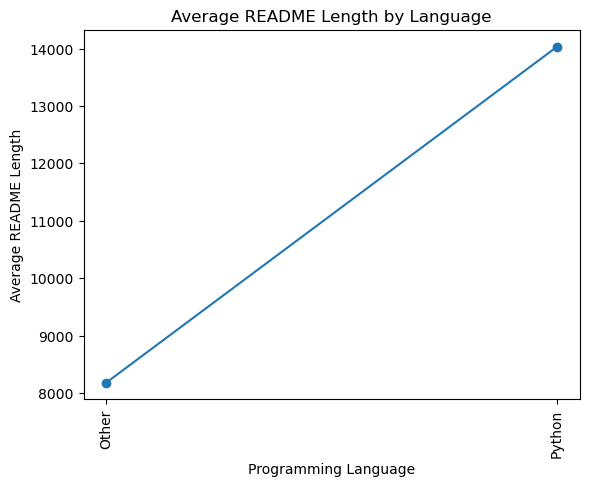

In [34]:
explore.plot_average_length_by_language(languages, lengths)

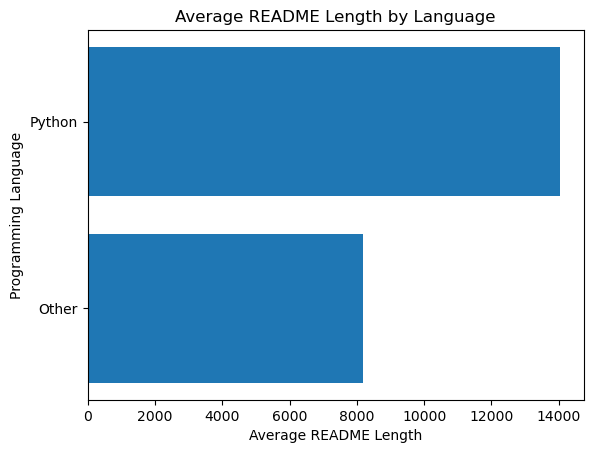

In [35]:
explore.plot_average_length_by_language_barh(languages, lengths)

In [36]:
# Load the DataFrame to a CSV file
df = pd.read_csv('readme_data.csv')

In [37]:
# Save the DataFrame to a CSV file
df.to_csv('readme_data.csv', index=False)

In [38]:
df

,Repository,Readme,Language,POS_tags,Lemmas,Word,Count,Average_Readme_Length
0,EbookFoundation/free-programming-books,perhaps merged clicking languages howtodocshow...,Other,"[('perhaps', 'RB'), ('merged', 'VBD'), ('click...","['perhaps', 'merge', 'click', 'language', 'how...",find,1,8183.876404
1,996icu/996.ICU,licenses practitioners btcbtc advice youzan co...,Other,"[('licenses', 'NNS'), ('practitioners', 'NNS')...","['license', 'practitioner', 'btcbtc', 'advice'...",find,1,8183.876404
2,jwasham/coding-interview-university,fork stored copied resizing markov designing r...,Other,"[('fork', 'NN'), ('stored', 'VBD'), ('copied',...","['fork', 'store', 'copied', 'resize', 'markov'...",find,1,8183.876404
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other,"[('neuroscience', 'NN'), ('stored', 'VBD'), ('...","['neuroscience', 'store', 'healthcare', 'marko...",find,1,8183.876404
4,public-apis/public-apis,geodatagovgr senseboxes covid diagrams vatcomp...,Python,"[('geodatagovgr', 'NN'), ('senseboxes', 'NNS')...","['geodatagovgr', 'senseboxes', 'covid', 'diagr...",announcement,1,14033.818182
...,...,...,...,...,...,...,...,...
95,coder/code-server,prints downloads provider vm indepth join help...,Other,"[('prints', 'NNS'), ('downloads', 'NNS'), ('pr...","['print', 'downloads', 'provider', 'vm', 'inde...",find,1,8183.876404
96,resume/resume.github.com,persons project gem based rackup ruby mode con...,Other,"[('persons', 'NNS'), ('project', 'VBP'), ('gem...","['person', 'project', 'gem', 'base', 'rackup',...",find,1,8183.876404
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,Other,"[('fork', 'NN'), ('utilsgentestcertssh', 'JJ')...","['fork', 'utilsgentestcertssh', 'rediscommand'...",find,1,8183.876404
98,reduxjs/redux,stored subscribe eriksons tiny cues idea want ...,Other,"[('stored', 'VBN'), ('subscribe', 'JJ'), ('eri...","['store', 'subscribe', 'eriksons', 'tiny', 'cu...",find,1,8183.876404


In [39]:
# Print the cleaned dataset
df.head(20)

,Repository,Readme,Language,POS_tags,Lemmas,Word,Count,Average_Readme_Length
0,EbookFoundation/free-programming-books,perhaps merged clicking languages howtodocshow...,Other,"[('perhaps', 'RB'), ('merged', 'VBD'), ('click...","['perhaps', 'merge', 'click', 'language', 'how...",find,1,8183.876404
1,996icu/996.ICU,licenses practitioners btcbtc advice youzan co...,Other,"[('licenses', 'NNS'), ('practitioners', 'NNS')...","['license', 'practitioner', 'btcbtc', 'advice'...",find,1,8183.876404
2,jwasham/coding-interview-university,fork stored copied resizing markov designing r...,Other,"[('fork', 'NN'), ('stored', 'VBD'), ('copied',...","['fork', 'store', 'copied', 'resize', 'markov'...",find,1,8183.876404
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other,"[('neuroscience', 'NN'), ('stored', 'VBD'), ('...","['neuroscience', 'store', 'healthcare', 'marko...",find,1,8183.876404
4,public-apis/public-apis,geodatagovgr senseboxes covid diagrams vatcomp...,Python,"[('geodatagovgr', 'NN'), ('senseboxes', 'NNS')...","['geodatagovgr', 'senseboxes', 'covid', 'diagr...",announcement,1,14033.818182
5,kamranahmedse/developer-roadmap,devops dev contributors spread dependencies pr...,Other,"[('devops', 'NNS'), ('dev', 'VBP'), ('contribu...","['devops', 'dev', 'contributor', 'spread', 'de...",find,1,8183.876404
6,donnemartin/system-design-primer,stored diagrams provided manytomany memcache d...,Python,"[('stored', 'JJ'), ('diagrams', 'NNS'), ('prov...","['stored', 'diagram', 'provide', 'manytomany',...",announcement,1,14033.818182
7,facebook/react,prs rest right compose keep user data adoption...,Other,"[('prs', 'NN'), ('rest', 'NN'), ('right', 'RB'...","['pr', 'rest', 'right', 'compose', 'keep', 'us...",find,1,8183.876404
8,vuejs/vue,applications escompliant projectcomponenttool ...,Other,"[('applications', 'NNS'), ('escompliant', 'JJ'...","['application', 'escompliant', 'projectcompone...",find,1,8183.876404
9,codecrafters-io/build-your-own-x,hero reconciler ruby chatbot shell roguenethac...,Other,"[('hero', 'NN'), ('reconciler', 'NN'), ('ruby'...","['hero', 'reconciler', 'ruby', 'chatbot', 'she...",find,1,8183.876404


In [40]:
# Save the DataFrame to a CSV file
df.to_csv('readme_data.csv', index=False)

In [41]:
df

,Repository,Readme,Language,POS_tags,Lemmas,Word,Count,Average_Readme_Length
0,EbookFoundation/free-programming-books,perhaps merged clicking languages howtodocshow...,Other,"[('perhaps', 'RB'), ('merged', 'VBD'), ('click...","['perhaps', 'merge', 'click', 'language', 'how...",find,1,8183.876404
1,996icu/996.ICU,licenses practitioners btcbtc advice youzan co...,Other,"[('licenses', 'NNS'), ('practitioners', 'NNS')...","['license', 'practitioner', 'btcbtc', 'advice'...",find,1,8183.876404
2,jwasham/coding-interview-university,fork stored copied resizing markov designing r...,Other,"[('fork', 'NN'), ('stored', 'VBD'), ('copied',...","['fork', 'store', 'copied', 'resize', 'markov'...",find,1,8183.876404
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other,"[('neuroscience', 'NN'), ('stored', 'VBD'), ('...","['neuroscience', 'store', 'healthcare', 'marko...",find,1,8183.876404
4,public-apis/public-apis,geodatagovgr senseboxes covid diagrams vatcomp...,Python,"[('geodatagovgr', 'NN'), ('senseboxes', 'NNS')...","['geodatagovgr', 'senseboxes', 'covid', 'diagr...",announcement,1,14033.818182
...,...,...,...,...,...,...,...,...
95,coder/code-server,prints downloads provider vm indepth join help...,Other,"[('prints', 'NNS'), ('downloads', 'NNS'), ('pr...","['print', 'downloads', 'provider', 'vm', 'inde...",find,1,8183.876404
96,resume/resume.github.com,persons project gem based rackup ruby mode con...,Other,"[('persons', 'NNS'), ('project', 'VBP'), ('gem...","['person', 'project', 'gem', 'base', 'rackup',...",find,1,8183.876404
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,Other,"[('fork', 'NN'), ('utilsgentestcertssh', 'JJ')...","['fork', 'utilsgentestcertssh', 'rediscommand'...",find,1,8183.876404
98,reduxjs/redux,stored subscribe eriksons tiny cues idea want ...,Other,"[('stored', 'VBN'), ('subscribe', 'JJ'), ('eri...","['store', 'subscribe', 'eriksons', 'tiny', 'cu...",find,1,8183.876404


In [43]:
# Save the DataFrame to a CSV file
df.to_csv('readme_github_cleaned.csv', index=False)

> Ready for Explore?

In [44]:
df.columns

Index(['Repository', 'Readme', 'Language', 'POS_tags', 'Lemmas', 'Word',
       'Count', 'Average_Readme_Length'],
      dtype='object')

In [45]:
# Call the function and pass your DataFrame as the argument
model.train_and_evaluate_model(df)

              precision    recall  f1-score   support

       Other       0.90      1.00      0.95        18
      Python       1.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.95      0.50      0.47        20
weighted avg       0.91      0.90      0.85        20



In [46]:
df.columns

Index(['Repository', 'Readme', 'Language', 'POS_tags', 'Lemmas', 'Word',
       'Count', 'Average_Readme_Length'],
      dtype='object')

Performs a text classification task using machine learning algorithms. The goal is to predict the programming language of a repository based on the contents of its README file.

Here's an explanation of the code and the resulting classification report:

The code starts by splitting the data into training and testing sets. The README content (df['Readme']) is used as the input features, and the corresponding programming language (df['Language']) is the target variable. The data is divided into 80% training set and 20% testing set.
4-6. The TF-IDF vectorizer (TfidfVectorizer()) is created. This is a technique that converts text documents into numerical vectors, representing the importance of words in the documents.

8-9. The vectorizer is fitted on the training data (X_train) to learn the vocabulary and calculate the TF-IDF weights for the words.

11-12. The testing data (X_test) is transformed using the fitted vectorizer, resulting in numerical vectors that represent the README contents.

14-15. A Support Vector Machine (SVM) classifier (SVC()) is created. SVM is a machine learning algorithm used for classification tasks.

The SVM classifier is trained on the training data (X_train_vectors, y_train), where it learns patterns and relationships between the README contents and their corresponding programming languages.
The trained SVM classifier is used to make predictions on the testing data (X_test_vectors).
The classification_report function is called to generate a report that evaluates the performance of the classification. It calculates various metrics such as precision, recall, F1-score, and support for each programming language. The zero_division=1 parameter is set to handle the case where a programming language has no predicted samples.
The resulting classification report shows the performance metrics for each programming language. Precision represents the accuracy of the predictions for each language, recall measures the coverage of the predictions, and F1-score is a combination of precision and recall. The support column indicates the number of samples in the testing set for each language.

Overall, the classification report shows the performance of the model in predicting the programming languages based on the README contents. The accuracy is given as 0.79, which means that the model predicted the correct programming language for 79% of the repositories in the testing set. The precision, recall, and F1-score values vary for different programming languages, indicating how well the model performs for each specific language. The macro avg and weighted avg values provide an overall evaluation of the model's performance across all languages.

In [47]:
# Call the function with your DataFrame 'df'
explore.add_word_count_and_average_length(df)

In [48]:
df

,Repository,Readme,Language,POS_tags,Lemmas,Word,Count,Average_Readme_Length,Word_Count,Average_Word_Length
0,EbookFoundation/free-programming-books,perhaps merged clicking languages howtodocshow...,Other,"[('perhaps', 'RB'), ('merged', 'VBD'), ('click...","['perhaps', 'merge', 'click', 'language', 'how...",find,1,8183.876404,200,7.045000
1,996icu/996.ICU,licenses practitioners btcbtc advice youzan co...,Other,"[('licenses', 'NNS'), ('practitioners', 'NNS')...","['license', 'practitioner', 'btcbtc', 'advice'...",find,1,8183.876404,338,8.026627
2,jwasham/coding-interview-university,fork stored copied resizing markov designing r...,Other,"[('fork', 'NN'), ('stored', 'VBD'), ('copied',...","['fork', 'store', 'copied', 'resize', 'markov'...",find,1,8183.876404,2171,10.450944
3,sindresorhus/awesome,neuroscience stored healthcare markov designin...,Other,"[('neuroscience', 'NN'), ('stored', 'VBD'), ('...","['neuroscience', 'store', 'healthcare', 'marko...",find,1,8183.876404,1613,9.703038
4,public-apis/public-apis,geodatagovgr senseboxes covid diagrams vatcomp...,Python,"[('geodatagovgr', 'NN'), ('senseboxes', 'NNS')...","['geodatagovgr', 'senseboxes', 'covid', 'diagr...",announcement,1,14033.818182,3673,9.728832
...,...,...,...,...,...,...,...,...,...,...
95,coder/code-server,prints downloads provider vm indepth join help...,Other,"[('prints', 'NNS'), ('downloads', 'NNS'), ('pr...","['print', 'downloads', 'provider', 'vm', 'inde...",find,1,8183.876404,116,6.517241
96,resume/resume.github.com,persons project gem based rackup ruby mode con...,Other,"[('persons', 'NNS'), ('project', 'VBP'), ('gem...","['person', 'project', 'gem', 'base', 'rackup',...",find,1,8183.876404,37,5.972973
97,redis/redis,fork utilsgentestcertssh rediscommand sentinel...,Other,"[('fork', 'NN'), ('utilsgentestcertssh', 'JJ')...","['fork', 'utilsgentestcertssh', 'rediscommand'...",find,1,8183.876404,793,8.393443
98,reduxjs/redux,stored subscribe eriksons tiny cues idea want ...,Other,"[('stored', 'VBN'), ('subscribe', 'JJ'), ('eri...","['store', 'subscribe', 'eriksons', 'tiny', 'cu...",find,1,8183.876404,583,9.689537


In [ ]:
df

In [49]:
# Call the function with your DataFrame 'df'
prepare.extracted_ngrams(df)

Top 10 Bigrams:
source_neg status_neg: 18
package_neg has_neg: 17
create_neg them_neg: 15
search_neg website_neg: 15
find_neg allow_neg: 14
default_neg users_neg: 13
performance_neg later_neg: 13
what_neg modern_neg: 13
documentation development: 12
keep_neg per_neg: 12


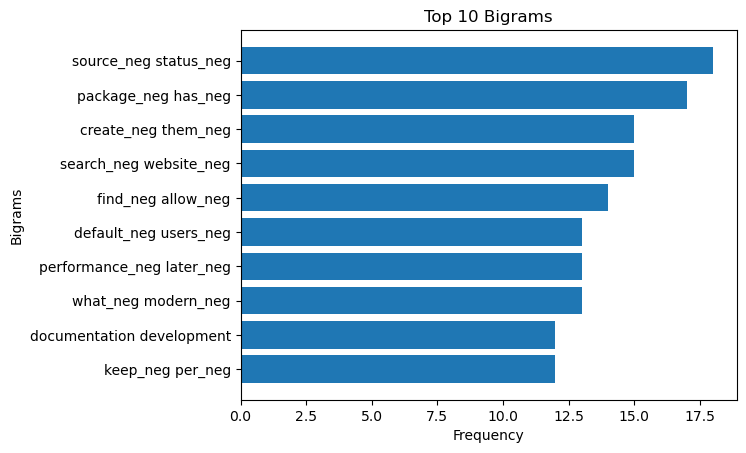

In [50]:
# Call the function with your DataFrame 'df'
explore.visualize_top_bigrams(df)

In [51]:
model.train_and_evaluate_models(df)

SVM Classification Report:
              precision    recall  f1-score   support

       Other       0.90      1.00      0.95        18
      Python       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20

Naive Bayes Classification Report:
              precision    recall  f1-score   support

       Other       0.90      1.00      0.95        18
      Python       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



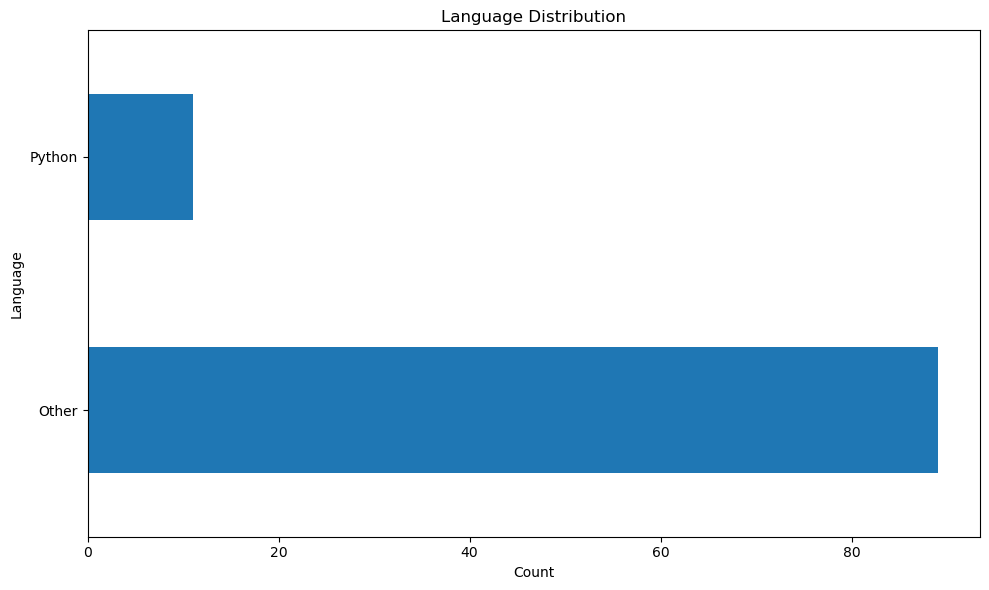

In [52]:
# Call the function with your DataFrame 'df' and the column name 'Language'
explore.plot_language_distribution(df, 'Language')

In [ ]:
df

> Final Test....

Classification Report:
              precision    recall  f1-score   support

       Other       0.90      1.00      0.95        18
      Python       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



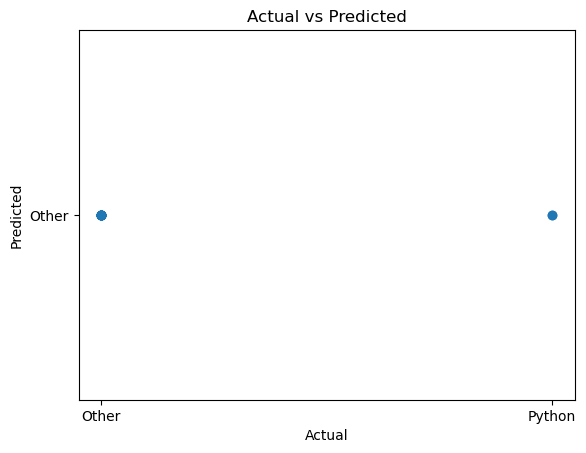

In [53]:
model.evaluate_models(df)